# Midterm Answer Script

**Name**: Ferdous Zeaul Islam  
**ID**: 173 1136 042  

**Course**: CSE445 (Machine Learning)  
**Faculty**: Dr. Sifat Momen (Sfm1)  
**Section**: 01  
**Semester**: Spring 2021  

  
    
 ### N.B- please put the diabetes.csv dataset on the same directory as the ipynb file.  
  

In [1]:
# only need this line in jupyter
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## (a) Read the dataset (which is in the csv format) using panda's dataframe.  


In [2]:
diabetes_df = pd.read_csv('./diabetes.csv')
diabetes_df.shape

(768, 9)

  
## (b) Find out the number of instances and the number of features (including the target class) in the dataset.  


In [3]:
print('Number of instances in the dataset =', diabetes_df.shape[0])

Number of instances in the dataset = 768


In [4]:
print('Number of features in the dataset =', diabetes_df.shape[1])

Number of features in the dataset = 9


## (c) Does the dataset have any missing entries? Show your workings.  


In [5]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### Explanation:
We can observe from the command on the previous line that all columns/features of the dataset have non-null count equal to the total number of instances that we found on on Question(b). Therefore, we can state that **to the naked eye there are no missing entries in this dataset.**  


## (d) Here “Outcome” is the target class and contains values zeros or ones. Determine how many instances have the outcome values zeroes and how many have the outcome values ones. Hence or otherwise, comment on whether this dataset suffers from class imbalance problem.

In [6]:
outcome_freq = diabetes_df.Outcome.value_counts()
outcome_freq

0    500
1    268
Name: Outcome, dtype: int64

In [7]:
num_total_instances = diabetes_df.shape[0]
num_outcome_zero = outcome_freq[0]
num_outcome_one = outcome_freq[1]

In [8]:
outcome_zero_data_percentage = round((num_outcome_zero*100)/num_total_instances, 3)
print('Percentage of data with outcome zero =', outcome_zero_data_percentage)

Percentage of data with outcome zero = 65.104


In [9]:
outcome_one_data_percentage = round((num_outcome_one*100)/num_total_instances, 3)
print('Percentage of data with outcome one =', outcome_one_data_percentage)

Percentage of data with outcome one = 34.896


### Explanation:
With respect to "Outcome" we see that there are **65.104% data with value zero** and remaining **34.896% data with value one**. Clearly, **the dataset suffers from class imbalance.**  

## (e) Show the first 5 and the last 5 instances of the dataset.

In [10]:
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [11]:
diabetes_df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


## (f) Often, in many datasets, it may appear that there exists no missing entries. However, when you look at the dataset closely, it is often found that the missing entries are replaced by a zero (0). Check if this dataset has this issue or not. Show and explain your workings.

In [12]:
diabetes_df[30:35]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
30,5,109,75,26,0,36.0,0.546,60,0
31,3,158,76,36,245,31.6,0.851,28,1
32,3,88,58,11,54,24.8,0.267,22,0
33,6,92,92,0,0,19.9,0.188,28,0
34,10,122,78,31,0,27.6,0.512,45,0


In [13]:
diabetes_df[342:347]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
342,1,0,68,35,0,32.0,0.389,22,0
343,5,122,86,0,0,34.7,0.290,33,0
344,8,95,72,0,0,36.8,0.485,57,0
345,8,126,88,36,108,38.5,0.349,49,0
346,1,139,46,19,83,28.7,0.654,22,0


In [14]:
diabetes_df[706:711]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
706,10,115,0,0,0,0.0,0.261,30,1
707,2,127,46,21,335,34.4,0.176,22,0
708,9,164,78,0,0,32.8,0.148,45,1
709,2,93,64,32,160,38.0,0.674,23,1
710,3,158,64,13,387,31.2,0.295,24,0


In [15]:
diabetes_df[(diabetes_df['DiabetesPedigreeFunction'] == 0)].shape[0]

0

In [16]:
diabetes_df[(diabetes_df['Age'] == 0)].shape[0]

0

### Explanation- 
Apart from the 'Pregnancy' and 'Outcome' columns any other column with the value 0 is non-sensical. By printing various segments of the data we see that some instances have 0 value for columns- 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin' and 'BMI'. So we can state that, **there are missing datas replaced with 0 in this dataset.** Further calculations are shown below,

In [17]:
missing_data_count = diabetes_df[ (diabetes_df['Glucose']==0) | (diabetes_df['BloodPressure']==0) | (diabetes_df['BMI']==0) 
                           | (diabetes_df['Insulin']==0) | (diabetes_df['SkinThickness']==0) ].shape[0]

print('A total of', missing_data_count, 'instances have missing data (one or more columns invalidly contain zero).')


A total of 376 instances have missing data (one or more columns invalidly contain zero).


## (g) Draw a histogram for each numerical features. You may use the hist() function of the panda's dataframe. Documentation on this can be found at https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.hist.html  
### In order to make the histograms for each features visually appealing, you are advised to tweak bins and figsize parameters.

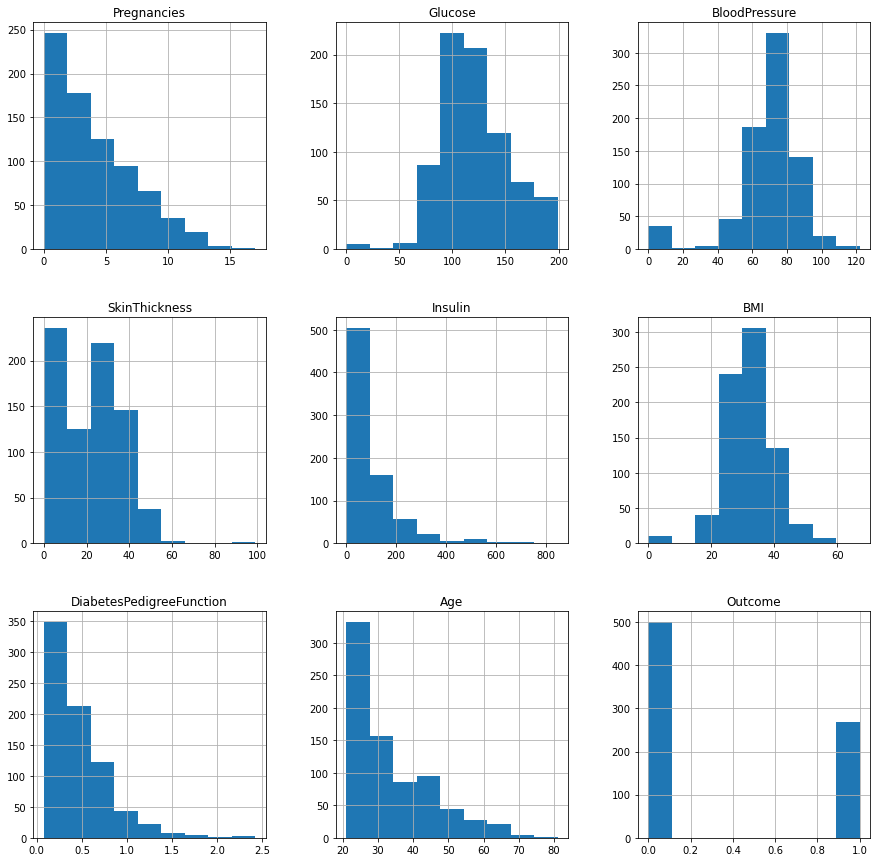

In [18]:
diabetes_df.hist(bins = 9, figsize = (15, 15))
plt.show()

## (h) One of the ways to visualize how each attribute is correlated with other attributes is by drawing a seaborn correlation heatmap. Read the documentation on how to generate correlation heatmap using the seaborn library. The following link provides a quick overview on how to do this: https://www.geeksforgeeks.org/how-to-create-a-seaborn-correlation-heatmap-in-python/

### I strongly suggest you to adjust the figure size before using the heatmap. For instance, you can write the code plt.figure (figsize = (a,b)) before using the seaborn's heatmap [Here a and b are appropriate choices for the figure size that you need to decide on].

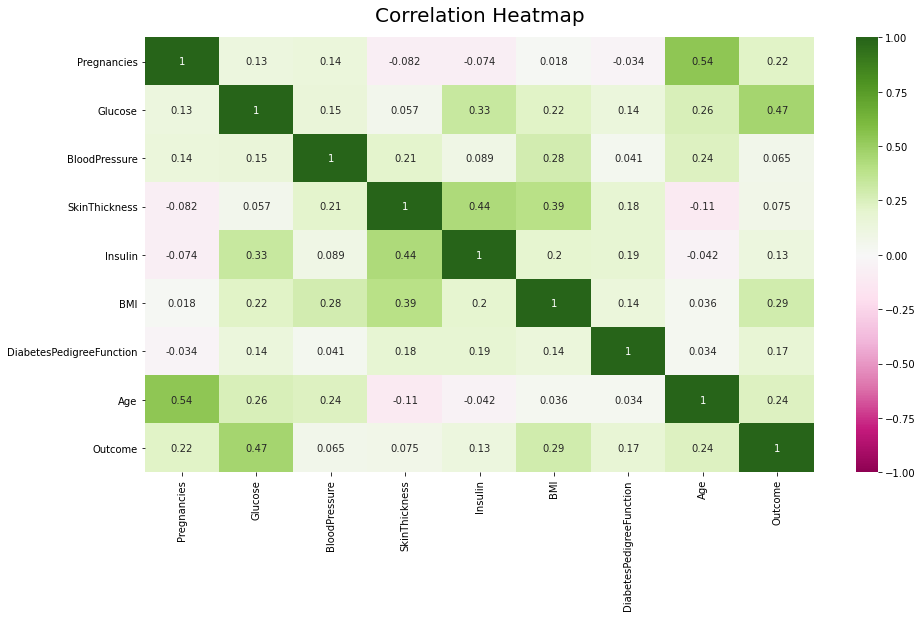

In [19]:
import seaborn

# help taken from -> 
# https://medium.com/@szabo.bibor/how-to-create-a-seaborn-correlation-heatmap-in-python-834c0686b88e

plt.figure(figsize=(15, 8))

corr_matrix = diabetes_df.corr()

# mask to hide the upper triangle of the symmetric corr-matrix
# mask = np.triu(np.ones_like(corr_matrix, dtype=np.bool))

heatmap = seaborn.heatmap(
            
    # correlation matrix
    corr_matrix,

    # mask the top triangle of the matrix
    # mask=mask,
    
    # two-contrast color, different color for + -
    cmap="PiYG",
    
    # color map range
    vmin=-1, vmax=1,
    
    # show corr values in the cells
    annot=True
)

# set a title
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':20}, pad=16);

plt.show()

## (i) If this dataset has the issue discussed in (f), you are now required to write a function in python that will replace each zeros by the corresponding median value of the features. Note that you may require to use the numpy library.  


We saw in (f) that there were some invalid zeroes in the columns- **'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin' and 'BMI'**. 

In [20]:
column_with_invalid_zeroes = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

for column in column_with_invalid_zeroes:
    # extract the column from original dataframe
    column_data = diabetes_df[column]
    # replace zero values with np.NaN
    column_data = column_data.replace(0, np.NaN)
    # replace np.NaN values with the median
    column_data = column_data.fillna(column_data.median())
    
    # put the column in the original dataframe
    diabetes_df[column] = column_data

Now if we run the same code as we did of (f) to count missing values (i.e contains invalid zero),

In [21]:
missing_data_count = diabetes_df[ (diabetes_df['Glucose']==0) | (diabetes_df['BloodPressure']==0) 
                                    | (diabetes_df['BMI']==0) | (diabetes_df['Insulin']==0) 
                                    | (diabetes_df['SkinThickness']==0) ].shape[0]

print('A total of', missing_data_count, 'instances have missing data (one or more columns invalidly contain zero).')

A total of 0 instances have missing data (one or more columns invalidly contain zero).


**Therefore we can safely assume that invalid zeroes have been replaced by their columns median values.**

## (j) Split the dataset into X and y where X contains all the predictors and y contains only the entries in the target class.

In [22]:
X = diabetes_df.drop(columns=['Outcome'])
y = diabetes_df['Outcome']

In [23]:
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [24]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33


In [25]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

## (k) Use the train_test_split function to split the dataset into train set and test set in the ratio 80:20.

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [27]:
train_data_percentage = round((X_train.shape[0]/X.shape[0])*100, 2)
test_data_percentage = round((X_test.shape[0]/X.shape[0])*100, 2)

print("Test size = " + str(test_data_percentage) + "%" + " Train size = " + str(train_data_percentage) + "%")

Test size = 20.05% Train size = 79.95%


## (l) Write a code to implement the zeroR classifier (i.e. a baseline classifier) on this dataset. Determine the precision, recall, F1 score, train accuracy and the test accuracy.

In [28]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report

# ZeroR classifier
model = DummyClassifier(strategy = 'most_frequent', random_state = 42) 
# Dataset is trained and a model is created
model.fit(X_train,y_train)

y_train_predictions = model.predict(X_train)
y_test_predictions = model.predict(X_test)

print('For the train predictions:\n', classification_report(y_train, y_train_predictions))
print()
print('For the test predictions:\n', classification_report(y_test, y_test_predictions))

For the train predictions:
               precision    recall  f1-score   support

           0       0.65      1.00      0.79       400
           1       0.00      0.00      0.00       214

    accuracy                           0.65       614
   macro avg       0.33      0.50      0.39       614
weighted avg       0.42      0.65      0.51       614


For the test predictions:
               precision    recall  f1-score   support

           0       0.65      1.00      0.79       100
           1       0.00      0.00      0.00        54

    accuracy                           0.65       154
   macro avg       0.32      0.50      0.39       154
weighted avg       0.42      0.65      0.51       154



/home/demislam/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## (m) Apply the KNN classifier with the euclidean distance as the distance metric on this dataset. You need to determine a suitable value of the hyperparameter, k. One way to do this is to apply the KNN classifier with different values of k and determine the train and test accuracies. Plot a graph of train and test accuracy with respect to k and determine the value of k for which the difference between the train and the test accuracy is minimum. You may require to do feature scaling before using the KNN classifier.

Before we begin applying KNN algorithm we need to Scale our dataset. **We must scale test and train both segments of the dataset using the same min, max values for corresponding columns.**

In [29]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.preprocessing import MinMaxScaler

In [30]:
X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
353,1,90.0,62.0,12.0,43.0,27.2,0.580,24
711,5,126.0,78.0,27.0,22.0,29.6,0.439,40
373,2,105.0,58.0,40.0,94.0,34.9,0.225,25
46,1,146.0,56.0,29.0,125.0,29.7,0.564,29
682,0,95.0,64.0,39.0,105.0,44.6,0.366,22


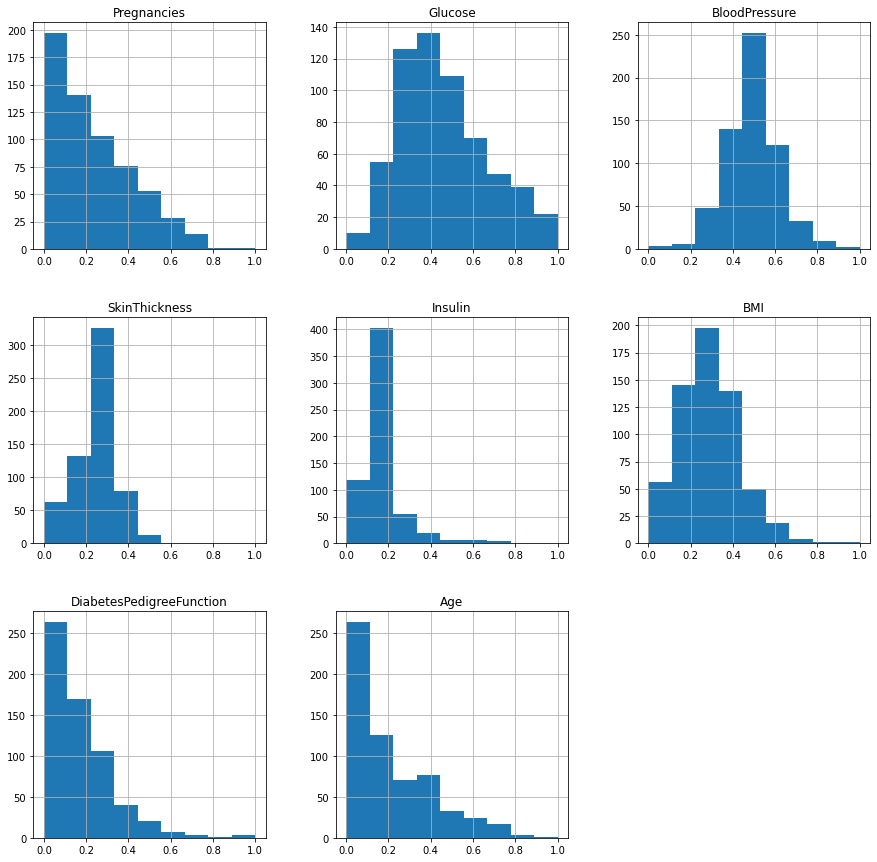

In [31]:
scaler = MinMaxScaler()
X_train_scaled_using_library = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)

X_train_scaled_using_library.hist(bins = 9, figsize = (15, 15))
plt.show()

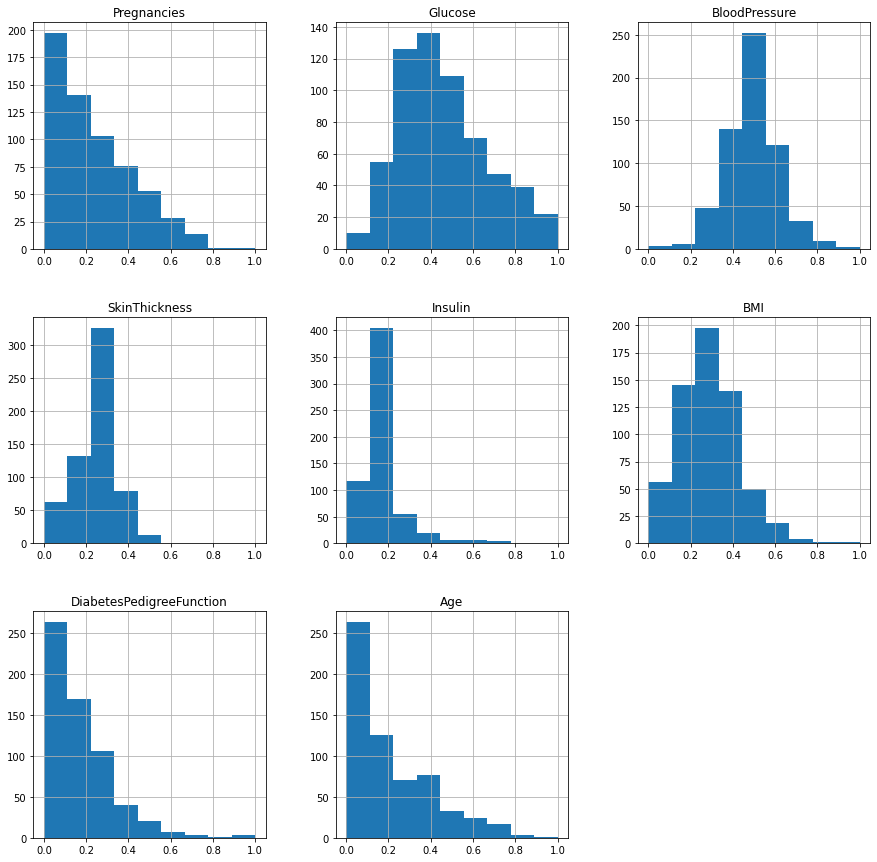

In [32]:
columns = X.columns

X_train_col_min = []
X_train_col_max = []
col_idx = 0
for column in columns:
    X_train_col_max.append(X_train[column].max())
    X_train_col_min.append(X_train[column].min())

X_train_scaled = X_train.copy()

# MUST MAKE COLUMNS INTO FLOAT DATATYPE, UNLESS SCALING WILL NOT WORK
# spent 3hs for this (:
X_train_scaled[list(columns)] = X_train_scaled[list(columns)].astype(float)

for (row_idx, data) in X_train.iterrows():
    col_idx = 0
    for val in data:
        column = columns[col_idx]
        scaled_val = (val - X_train_col_min[col_idx]) / (X_train_col_max[col_idx] - X_train_col_min[col_idx])
        X_train_scaled.at[row_idx, column] = float(scaled_val)
        
        col_idx += 1
        
X_train_scaled.hist(bins = 9, figsize = (15, 15))
plt.show()

Among the above two scaling, the first one was done using MinMaxScaler() of sklearn library. The second one was done by manually implementing the scaling process. From the two histograms diagrams of each column from above we can conclude that our manual scaling process is as accurate as the MinMaxScaler() of sklearn library.  

Now we can proceed to manually scale the test set, **using the minimum and maximum values of the train dataset**,

In [33]:
X_test_scaled = X_test.copy()

X_test_scaled[list(columns)] = X_test_scaled[list(columns)].astype(float)

for (row_idx, data) in X_test_scaled.iterrows():
    
    col_idx = 0
    for val in data:
        column = columns[col_idx]
        scaled_val = (val - X_train_col_min[col_idx]) / (X_train_col_max[col_idx] - X_train_col_min[col_idx])
        X_test_scaled.at[row_idx, column] = scaled_val
        
        col_idx += 1

X_test_scaled.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
44,0.411765,0.720280,0.408163,0.239130,0.150892,0.188139,0.093541,0.316667
672,0.588235,0.083916,0.836735,0.173913,0.046639,0.353783,0.089532,0.433333
700,0.117647,0.461538,0.530612,0.217391,0.253772,0.361963,0.177728,0.083333
630,0.411765,0.405594,0.408163,0.239130,0.150892,0.188139,0.288641,0.216667
81,0.117647,0.125874,0.489796,0.239130,0.150892,0.288344,0.008018,0.016667


Now we implement a function that applies KNN classifier for k values in the range provided as function parameter,

In [34]:
def check_k_in_range(left, right):
    k_values = []

    for i in range (left, right):
        k_values.append(i)

    train_accuracies = []
    test_accuracies = []

    for k in k_values:
        # k-nn classifier witk k neighbours and euclidian distance
        model = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=2)
        # train model
        model.fit(X_train_scaled, y_train)

        # train predictions
        y_train_predictions = model.predict(X_train_scaled)
        # train accuracy for current k value
        train_accuracies.append(accuracy_score(y_train, y_train_predictions))

        # test predictions
        y_test_predictions = model.predict(X_test_scaled)
        # test accuracy for current k value
        test_accuracies.append(accuracy_score(y_test, y_test_predictions))

    # plot the Test-Accuracy, Training-Accuracy VS K-value
    plt.figure(figsize=(15, 8))
    plt.title('Train accuracy, Test accuracy vs K-values')
    plt.plot(k_values, train_accuracies, 'ro-', k_values, test_accuracies,'bv--')
    plt.legend(['Training Accuracy','Test Accuracy'])
    plt.xlabel('K values')
    plt.ylabel('Accuracy')

Minimum k =  1 Maximum k =  122


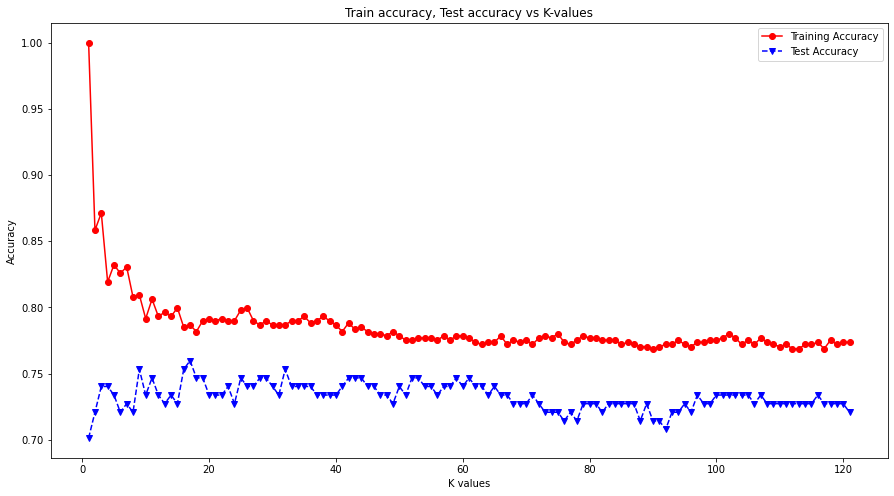

In [35]:
min_k = 1
max_k = int(X_train.shape[0]/5)

print('Minimum k = ', min_k, 'Maximum k = ', max_k)
    
check_k_in_range(min_k, max_k)

### Explanation-  

From the figure we can observe that an optiman k-value lies in the range 10 to 20. Because for this range Train Accuracies and Test Accuracies seem relatively closer, which means reduced chance of model getting too complex and overfitting. Let's test for k values in range 10 to 20 now.

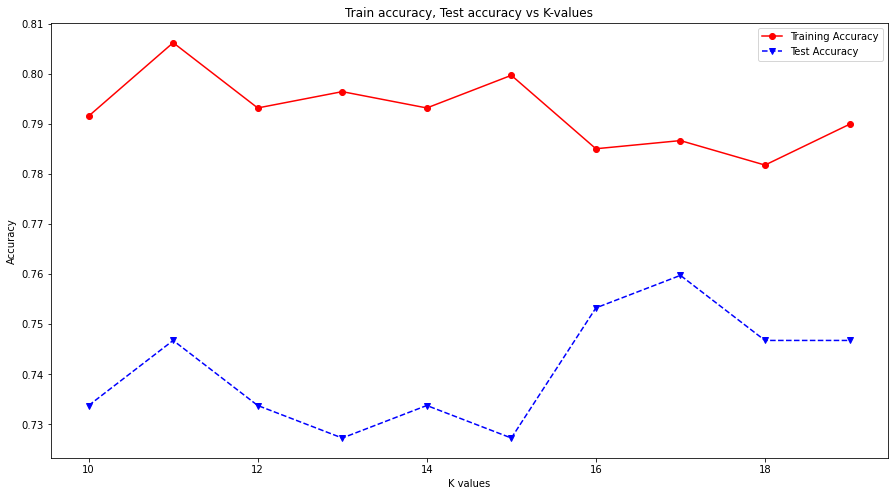

In [36]:
check_k_in_range(10, 20)

From the above three graphs we can state that **k=17 should be the optimal choice for our K nearest neighbour classifier.**

## (n) Apply the decision tree classifier with the “gini” criterion on this dataset. One of the hyperparameters of the decision tree classifier is max_depth. Apply the decision tree classifier with different values of max_depth and find the train and test accuracies. Plot a graph showing how the train and test accuracy varies with max_depth. Determine the most suitable value of max_depth. For a suitable value of max_depth, draw the decision tree.

In [37]:
from sklearn import tree

def check_decision_tree_max_depth_in_range(left, right):
    max_depths = []

    for i in range (left, right):
        max_depths.append(i)

    train_accuracies = []
    test_accuracies = []

    for depth in max_depths:
        # decision tree classifier with max_depth impurity measure 'gini'
        model = tree.DecisionTreeClassifier(criterion='gini',max_depth=depth)
        # train model
        model.fit(X_train, y_train)

        # train predictions
        y_train_predictions = model.predict(X_train)
        # train accuracy for current k value
        train_accuracies.append(accuracy_score(y_train, y_train_predictions))

        # test predictions
        y_test_predictions = model.predict(X_test)
        # test accuracy for current k value
        test_accuracies.append(accuracy_score(y_test, y_test_predictions))

    # plot the Test-Accuracy, Training-Accuracy VS K-value
    plt.figure(figsize=(15, 8))
    plt.title('Train accuracy, Test accuracy vs Max-Depths')
    plt.plot(max_depths, train_accuracies, 'ro-', max_depths, test_accuracies,'bv--')
    plt.legend(['Training Accuracy','Test Accuracy'])
    plt.xlabel('Max Depths')
    plt.ylabel('Accuracy')


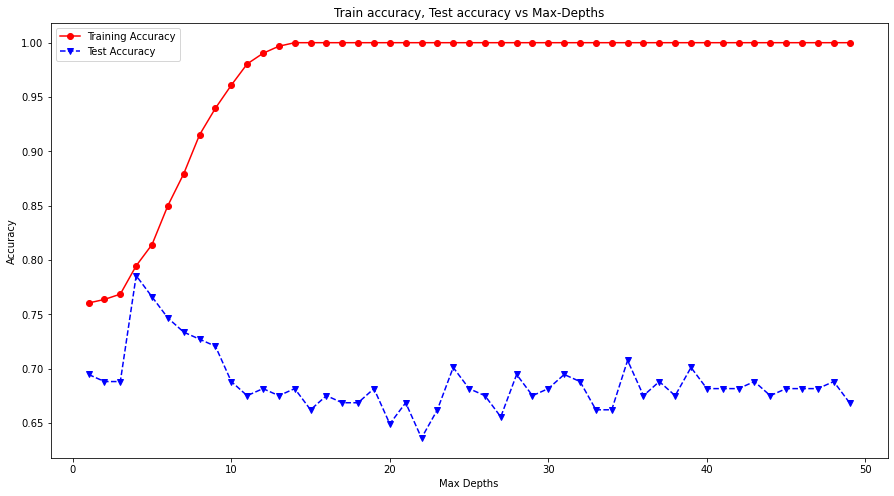

In [38]:
check_decision_tree_max_depth_in_range(1, 50)

It appears that our desired max_depth is somewhere in the range from 1 to 10. Let's find out,

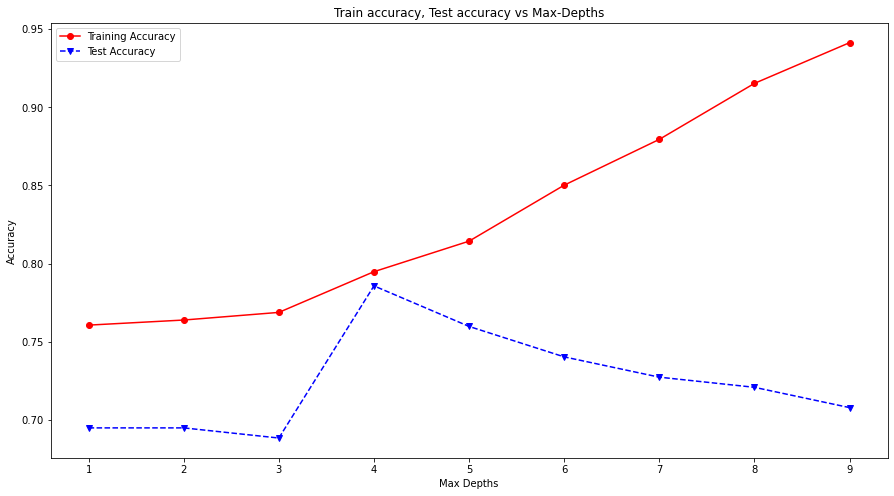

In [39]:
check_decision_tree_max_depth_in_range(1, 10)

From the graph we can state that **maxdepth = 4 is the optimal choice.** Now let's draw the decision tree for max_depth=4 and impurity measure as gini,

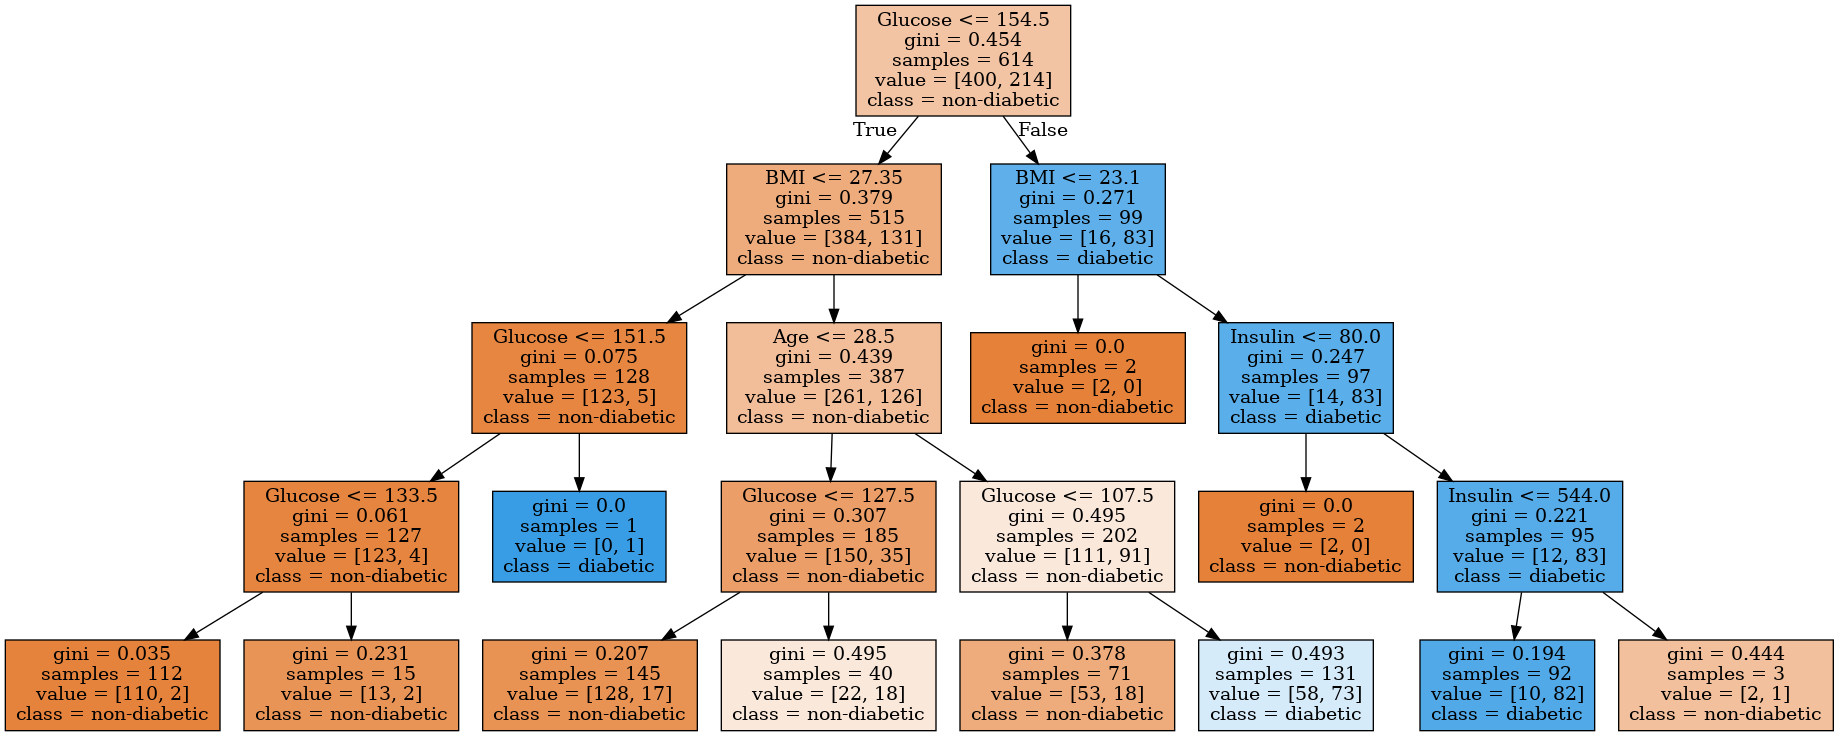

In [40]:
import pydotplus 
from IPython.display import Image

# decision tree classifier with max_depth = 4 and impurity measure 'gini'
model = tree.DecisionTreeClassifier(criterion='gini',max_depth=4)
# train model
model.fit(X_train, y_train)

dot_data = tree.export_graphviz(model, feature_names=X_train.columns, class_names=['non-diabetic','diabetic'], 
                                filled=True, out_file=None) 
graph = pydotplus.graph_from_dot_data(dot_data) 
Image(graph.create_png())

## (o) Read the article “How to configure k-fold cross validation” and apply 10-fold cross validation using the classifiers in m and n. Determine the performance of the classifiers (accuracy, precision, recall, f1-score and the area under the curve of the ROC curve) on this dataset. Link to the article: https://machinelearningmastery.com/how-to-configure-k-fold-cross-validation/

We have to initialize the 10-fold cross validator and our classifiers.

In [41]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

# 10-fold cross validation
cv = StratifiedKFold(n_splits = 10, random_state = 42, shuffle = True) 

Let's find out the accuracy, precision, recall and area under the ROC curve for decision tree classifier. To pick the max_depth hyper parameter for the decision tree we will pick the one with the highest average accuracy for 10-fold cross validation.

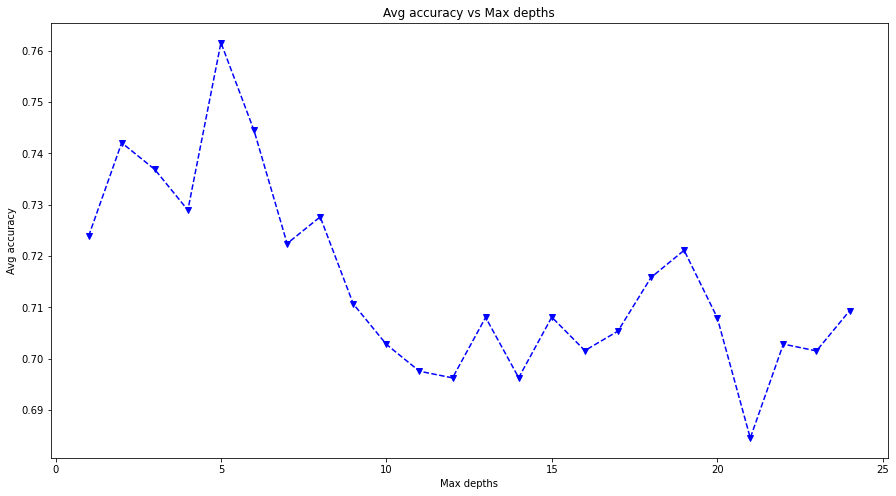

In [42]:
max_depths = []
for i in range (1, 25):
    max_depths.append(i)

accuracies = []

for depth in max_depths:
    model = tree.DecisionTreeClassifier(criterion='gini',max_depth=depth)
    accuracie_segments = cross_val_score(model, X, y, scoring = 'accuracy', cv = cv, n_jobs = 1)
    accuracies.append(np.mean(accuracie_segments))

plt.figure(figsize=(15, 8))
plt.title('Avg accuracy vs Max depths')
plt.plot(max_depths, accuracies,'bv--')
plt.xlabel('Max depths')
plt.ylabel('Avg accuracy')

plt.show()

So, **max_depth = 5** gives the highest accuracy.

In [43]:
# decision tree classifier with max_depth=5 impurity measure 'gini'
model_decision_tree = tree.DecisionTreeClassifier(criterion='gini',max_depth=5)

accuracies = cross_val_score(model_decision_tree, X, y, scoring = 'accuracy', cv = cv, n_jobs = 1)
precisions = cross_val_score(model_decision_tree, X, y, scoring = 'precision', cv = cv, n_jobs = 1)
recalls = cross_val_score(model_decision_tree, X, y, scoring = 'recall', cv = cv, n_jobs = 1)
f1s = cross_val_score(model_decision_tree, X, y, scoring = 'f1', cv = cv, n_jobs = 1)
aucs = cross_val_score(model_decision_tree, X, y, scoring = 'roc_auc', cv = cv, n_jobs = 1)

accuracy_decision_tree = np.mean(accuracies)
precision_decision_tree = np.mean(precisions)
recall_decision_tree = np.mean(recalls)
f1_decision_tree = np.mean(f1s)
auc_decision_tree = np.mean(aucs)

print('For the Decision Tree classifier:')
print('accuracy =', round(accuracy_decision_tree, 2)
      , 'precision =', round(precision_decision_tree, 2)
      , 'recall =', round(recall_decision_tree, 2)
      , 'f1-score =', round(f1_decision_tree, 2)
      , 'AUC =', round(auc_decision_tree, 2))

For the Decision Tree classifier:
accuracy = 0.76 precision = 0.68 recall = 0.65 f1-score = 0.64 AUC = 0.79


Let's find out the accuracy, precision, recall and area under the ROC curve for K-NN classifier. To pick the hyper parameter, k for the classifier we will pick the one with the highest average accuracy for 10-fold cross validation.

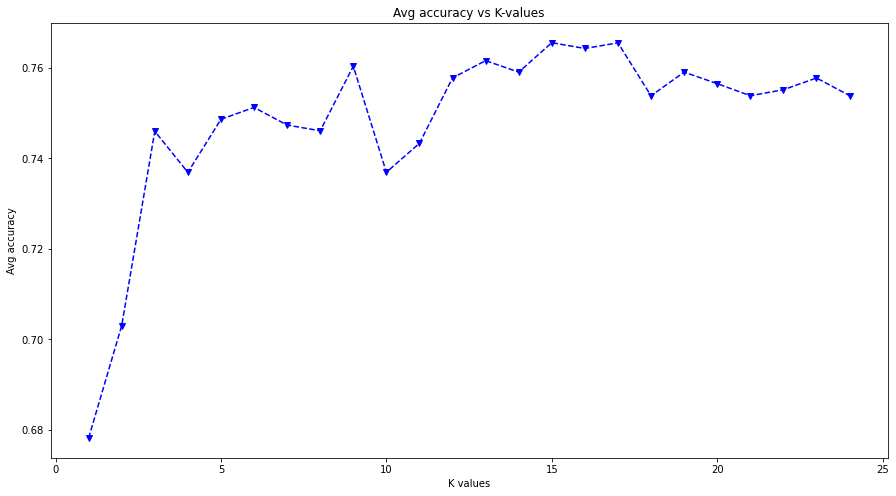

In [44]:
X_scaled = pd.DataFrame(MinMaxScaler().fit_transform(X), columns=X.columns)

k_values = []
for i in range (1, 25):
    k_values.append(i)

accuracies = []

for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=2)
    accuracy_segments = cross_val_score(model, X_scaled, y, scoring = 'accuracy', cv = cv, n_jobs = 1)
    accuracies.append(np.mean(accuracy_segments))

plt.figure(figsize=(15, 8))
plt.title('Avg accuracy vs K-values')
plt.plot(k_values, accuracies,'bv--')
plt.xlabel('K values')
plt.ylabel('Avg accuracy')

plt.show()

So, **k=17(or 15)** gives the highest average accuracy.

In [45]:
# k-nn classifier witk k=17 neighbours and euclidian distance
model_knn = KNeighborsClassifier(n_neighbors=17, metric='minkowski', p=2) 

accuracies = cross_val_score(model_knn, X_scaled, y, scoring = 'accuracy', cv = cv, n_jobs = 1)
precisions = cross_val_score(model_knn, X_scaled, y, scoring = 'precision', cv = cv, n_jobs = 1)
recalls = cross_val_score(model_knn, X_scaled, y, scoring = 'recall', cv = cv, n_jobs = 1)
f1s = cross_val_score(model_knn, X_scaled, y, scoring = 'f1', cv = cv, n_jobs = 1)
aucs = cross_val_score(model_knn, X_scaled, y, scoring = 'roc_auc', cv = cv, n_jobs = 1)

accuracy_knn = np.mean(accuracies)
precision_knn = np.mean(precisions)
recall_knn = np.mean(recalls)
f1_knn = np.mean(f1s)
auc_knn = np.mean(aucs)

print('For the K-NN classifier:')
print('accuracy =', round(accuracy_knn, 2)
      , ', precision =', round(precision_knn, 2)
      , ', recall =', round(recall_knn, 2)
      , ', f1-score =', round(f1_knn, 2)
      , ', AUC =', round(auc_knn, 2))

For the K-NN classifier:
accuracy = 0.77 , precision = 0.7 , recall = 0.59 , f1-score = 0.64 , AUC = 0.83


For comparison of performance let's draw a bar graph of evaluation metrics for the two classifiers.

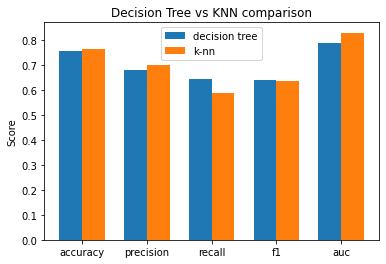

In [46]:
labels = ['accuracy', 'precision', 'recall', 'f1', 'auc']

decision_tree_evaluation_metrics = [accuracy_decision_tree, precision_decision_tree, recall_decision_tree, 
                                    f1_decision_tree, auc_decision_tree]
knn_evaluation_metrics = [accuracy_knn, precision_knn, recall_knn, f1_knn, auc_knn]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
ax.bar(x - width/2, decision_tree_evaluation_metrics, width, label='decision tree')
ax.bar(x + width/2, knn_evaluation_metrics, width, label='k-nn')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Score')
ax.set_title('Decision Tree vs KNN comparison')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()